In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # spacy
import re # removing the special characters
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\admin
[nltk_data]     dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\admin
[nltk_data]     dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv(r'C:\Users\admin dell\Desktop\mentoring folder\mental health\mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [3]:
df.shape

(27977, 2)

In [4]:
df.dtypes

text     object
label     int64
dtype: object

In [5]:
df['label'].unique()

array([0, 1])

In [6]:
df['label'].value_counts()

label
0    14139
1    13838
Name: count, dtype: int64

In [7]:
df.describe(include='all')

,text,label
count,27977,27977.000000
unique,27972,NaN
top,real suppleroot hours up day far,NaN
freq,3,NaN
mean,NaN,0.494621
std,NaN,0.499980
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(5)

In [10]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))



Number of Duplicates: 0


In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
def remove_stopwords(sentence):

    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any",
                 "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", 
                 "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each",
                 "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll",
                 "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's",
                 "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
                 "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
                 "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", 
                 "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's",
                 "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
                 "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", 
                 "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", 
                 "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",
                 "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're",
                 "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [13]:
df['text1'] = (df['text'].apply(remove_stopwords))

C:\Users\admin dell\AppData\Local\Temp\ipykernel_30216\1728670533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text1'] = (df['text'].apply(remove_stopwords))


In [14]:
df_comp = pd.DataFrame()

# Original text and its length
df_comp['pre-clean text'] = df['text']
df_comp['pre-clean len'] = df['text'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comp['post-clean text'] = df['text1']
df_comp['post-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

df_comp.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,dear american teens question dutch person hear...,23,dear american teens question dutch person hear...,23
1,nothing look forward lifei dont many reasons k...,20,nothing look forward lifei dont many reasons k...,19
2,music recommendations im looking expand playli...,64,music recommendations im looking expand playli...,61
3,im done trying feel betterthe reason im still ...,100,im done trying feel betterthe reason im still ...,96
4,worried year old girl subject domestic physic...,311,worried year old girl subject domestic physica...,296
5,hey rredflag sure right place post this goes ...,61,hey rredflag sure right place post goes im cur...,57
6,feel like someone needs hear tonight feeling r...,79,feel like someone needs hear tonight feeling r...,69
7,deserve liveif died right noone would carei re...,51,deserve liveif died right noone carei real fri...,47
8,feels good ive set dateim killing friday nice ...,14,feels good ive set dateim killing friday nice ...,13
9,live guiltok made stupid random choice its ge...,66,live guiltok made stupid random choice getting...,62


([<matplotlib.patches.Wedge at 0x1bf67cd4200>,
 [Text(-0.6929626438867462, -0.854284949052417, '0'),
  Text(0.7244610807383668, 0.8931159737096845, '1')],
 [Text(-0.37797962393822515, -0.4659736085740456, '50.5%'),
  Text(0.4094780021564681, 0.5048046807924303, '49.5%')])

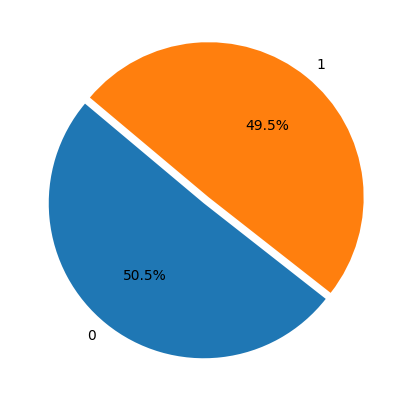

In [15]:
plt.figure(figsize=(5, 6))  # Set the size of the plot
plt.pie(df['label'].value_counts(),labels = df['label'].value_counts().index,autopct='%1.1f%%',
        explode=[0, 0.05] , startangle=140)

In [16]:
lemmatizer = WordNetLemmatizer()
data=[]

In [17]:


msg=df['text1'].str.replace('[^a-zA-Z0-9]+'," ")
msg



0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried year old girl subject domestic physica...
                               ...                        
27972    posting everyday people stop caring religion m...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat ok ...
Name: text1, Length: 27972, dtype: object

In [18]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to C:\Users\admin
[nltk_data]     dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried year old girl subject domestic physica...
                               ...                        
27972    posting everyday people stop caring religion m...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat ok ...
Name: text1, Length: 27972, dtype: object

In [20]:
import nltk
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Filter tokens with length greater than 2
    filtered_tokens = [token for token in tokens if len(token) > 3]
    
    # Stem each token
    lemmed_tokens = [lemmatizer.lemmatize(token.lower()) for token in filtered_tokens]
    
    # Join stemmed tokens into a single string
    preprocessed_text = " ".join(lemmed_tokens)
    
    return preprocessed_text

# Apply text preprocessing to each row of the DataFrame
df['preprocessed_text'] = msg.apply(preprocess_text)

[nltk_data] Downloading package wordnet to C:\Users\admin
[nltk_data]     dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\admin dell\AppData\Local\Temp\ipykernel_30216\2369773857.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = msg.apply(preprocess_text)


In [21]:
df['preprocessed_text']

0        dear american teen question dutch person heard...
1        nothing look forward lifei dont many reason ke...
2        music recommendation looking expand playlist u...
3        done trying feel betterthe reason still alive ...
4        worried year girl subject domestic physicalmen...
                               ...                        
27972    posting everyday people stop caring religion m...
27973    okay definetly need hear guy opinion pretty mu...
27974    cant think kill myselfthe last thing holding f...
27975    whats point princess bridei really think like ...
27976    nude person might might know snapchat chick do...
Name: preprocessed_text, Length: 27972, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:


from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(df['preprocessed_text'])
print(data_vec)



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1276914 stored elements and shape (27972, 64957)>
  Coords	Values
  (0, 13404)	0.24571330954053142
  (0, 2035)	0.199821721271026
  (0, 56380)	0.19724860463328622
  (0, 45538)	0.16061333928873464
  (0, 16696)	0.30192215266333966
  (0, 42525)	0.12336996614882491
  (0, 25556)	0.18090450167539326
  (0, 24579)	0.28866749325503477
  (0, 16871)	0.1931658942544791
  (0, 57112)	0.09357092022133989
  (0, 32541)	0.38710833000785794
  (0, 53016)	0.333408091936624
  (0, 57587)	0.3691103136536291
  (0, 23751)	0.3218163641408936
  (0, 33153)	0.07120047465131332
  (0, 48127)	0.11450863396808476
  (0, 35199)	0.2179168918831764
  (1, 33153)	0.11560407181162077
  (1, 39376)	0.370441477504394
  (1, 33865)	0.20964990620453078
  (1, 21462)	0.29394841446828784
  (1, 33017)	0.39895041739964926
  (1, 15899)	0.17394477840569078
  (1, 34898)	0.20227650270068856
  (1, 46356)	0.20365015704848863
  :	:
  (27970, 7133)	0.18130945086112663
  (27971, 42525)

In [24]:
import joblib
joblib.dump(tf, 'tf.pkl')

['tf.pkl']

In [25]:
df['text_length'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))



C:\Users\admin dell\AppData\Local\Temp\ipykernel_30216\987295424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))


In [26]:
df.head()

,text,label,text1,preprocessed_text,text_length
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,19
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reason ke...,18
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendation looking expand playlist u...,48
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,done trying feel betterthe reason still alive ...,79
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worried year girl subject domestic physicalmen...,269


In [27]:


df = df.drop(['text', 'text1'], axis=1)



In [28]:
df.head()

,label,preprocessed_text,text_length
0,0,dear american teen question dutch person heard...,19
1,1,nothing look forward lifei dont many reason ke...,18
2,0,music recommendation looking expand playlist u...,48
3,1,done trying feel betterthe reason still alive ...,79
4,1,worried year girl subject domestic physicalmen...,269


In [29]:


df.label.value_counts()



label
0    14134
1    13838
Name: count, dtype: int64

In [30]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)



In [32]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report,accuracy_score
# sv=SVC()
# sv.fit(x_train,y_train)
# y_pred=sv.predict(x_test)
# print(classification_report(y_test,y_pred))


In [33]:
# sv_acc=accuracy_score(y_test,y_pred)
# sv_acc

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# Dt=DecisionTreeClassifier()
# Dt.fit(x_train,y_train)
# y_pred=Dt.predict(x_test)
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

In [35]:
# dt_acc=accuracy_score(y_test,y_pred)
# dt_acc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

In [ ]:
Rf_acc=accuracy_score(y_test,y_pred)
Rf_acc

0.8841754051477597

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab= AdaBoostClassifier()
ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4271
           1       0.89      0.81      0.85      4121

    accuracy                           0.86      8392
   macro avg       0.86      0.86      0.86      8392
weighted avg       0.86      0.86      0.86      8392

0.8617731172545281


In [ ]:
ab_acc=accuracy_score(y_test,y_pred)
ab_acc

0.8617731172545281

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4271
           1       0.90      0.81      0.85      4121

    accuracy                           0.86      8392
   macro avg       0.86      0.86      0.86      8392
weighted avg       0.86      0.86      0.86      8392

0.8604623450905624


In [ ]:
gb_acc=accuracy_score(y_test,y_pred)
gb_acc

0.8604623450905624

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4271
           1       0.93      0.88      0.90      4121

    accuracy                           0.91      8392
   macro avg       0.91      0.91      0.91      8392
weighted avg       0.91      0.91      0.91      8392

0.9072926596758818


In [ ]:
lr_acc=accuracy_score(y_test,y_pred)
lr_acc

0.9072926596758818

In [ ]:
model = pd.DataFrame({'Model':['Support Vector Machine','Decision Tree','RandomForest',
                              'AdaBoost','GradientBoosting','Logistic Regression'],
                     'Score':[sv_acc,dt_acc,Rf_acc,ab_acc,gb_acc,lr_acc],
                      })
model

,Model,Score
0,Support Vector Machine,0.910033
1,Decision Tree,0.814228
2,RandomForest,0.884175
3,AdaBoost,0.861773
4,GradientBoosting,0.860462
5,Logistic Regression,0.907293


In [ ]:
y_new=sv.predict(tf.transform(["I'm overwhelmed with anxiety about the future."]))
if y_new==1:
    print("Positive")
if y_new==0:
    print("Negative")



Positive


In [ ]:
y_new=sv.predict(tf.transform(["I had a great time with friends last night."]))
if y_new==1:
    print("Positive")
if y_new==0:    print("Negative")


Negative


In [ ]:
import pickle
import warnings
pickle.dump(sv,open("model.pkl" , "wb"))